# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Retail Sales Prediction/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


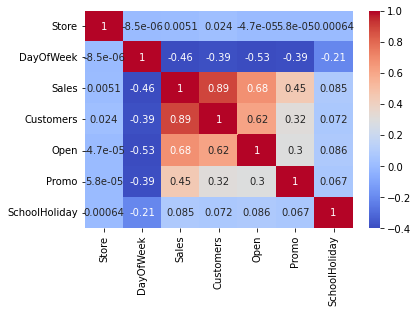

In [ ]:
sb.heatmap(df.corr(), vmin=-0.4, cmap='coolwarm', annot=True)

In [ ]:
final_columns = ['Sales','DayOfWeek','Customers','Open','Promo']

In [ ]:
df_final = df.loc[:,final_columns]

In [ ]:
df_final

,Sales,DayOfWeek,Customers,Open,Promo
0,5263,5,555,1,1
1,6064,5,625,1,1
2,8314,5,821,1,1
3,13995,5,1498,1,1
4,4822,5,559,1,1
...,...,...,...,...,...
1017204,0,2,0,0,0
1017205,0,2,0,0,0
1017206,0,2,0,0,0
1017207,0,2,0,0,0


In [ ]:
x_list = ['DayOfWeek','Customers','Open','Promo']

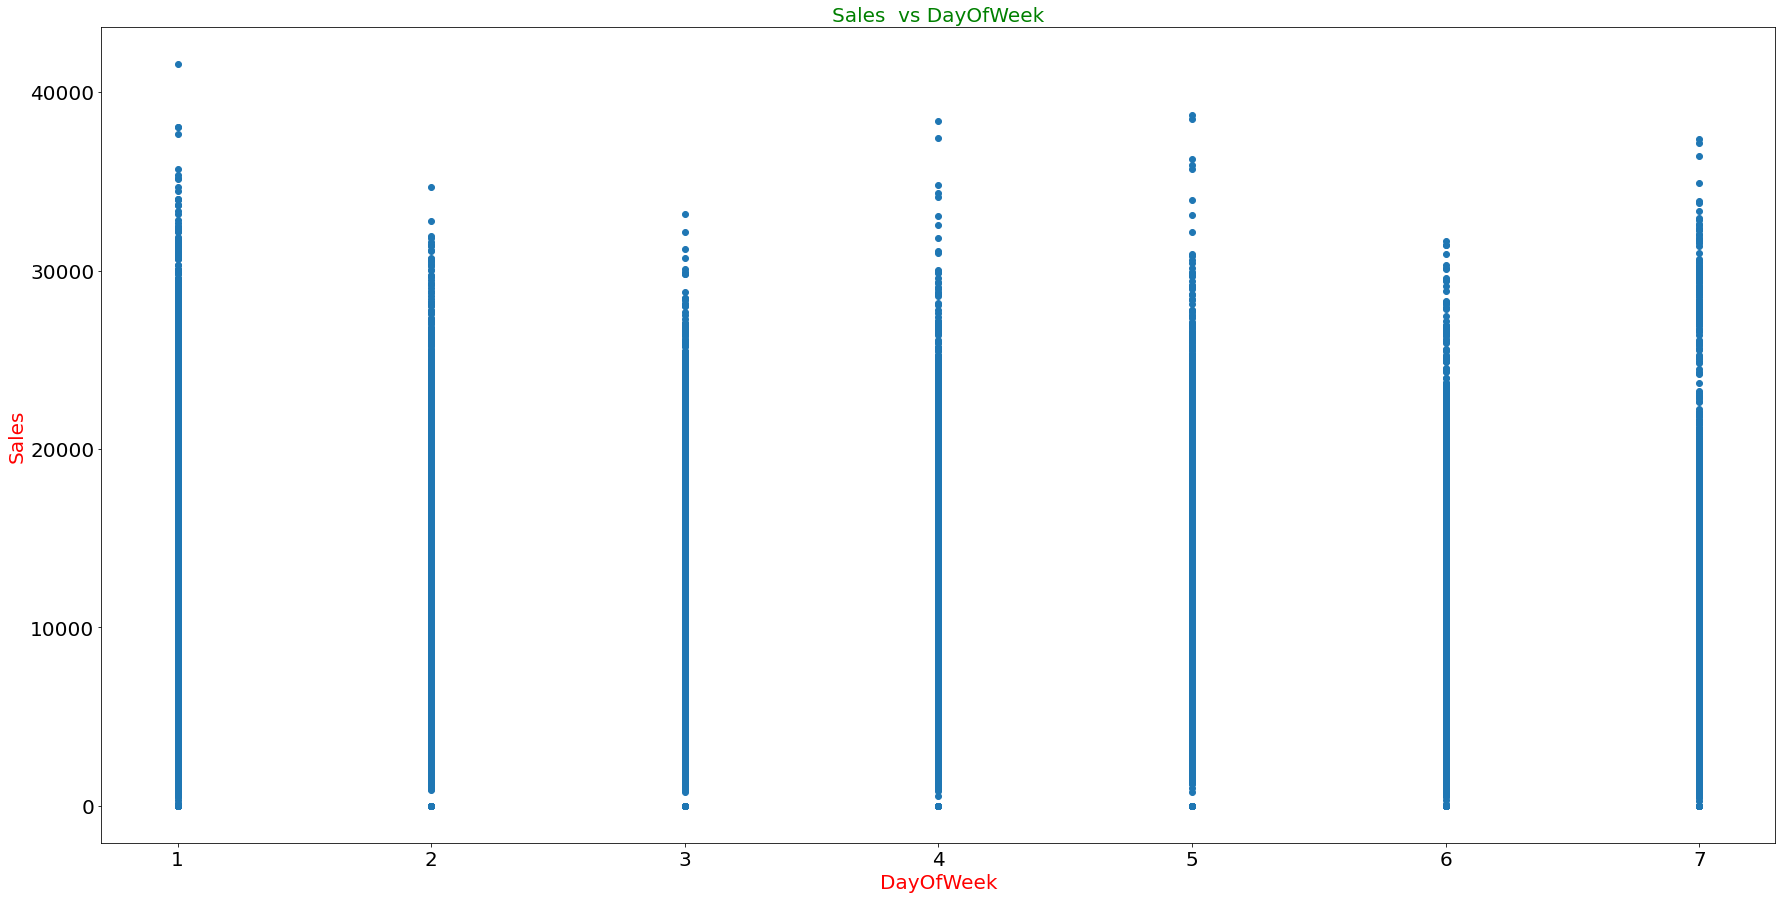

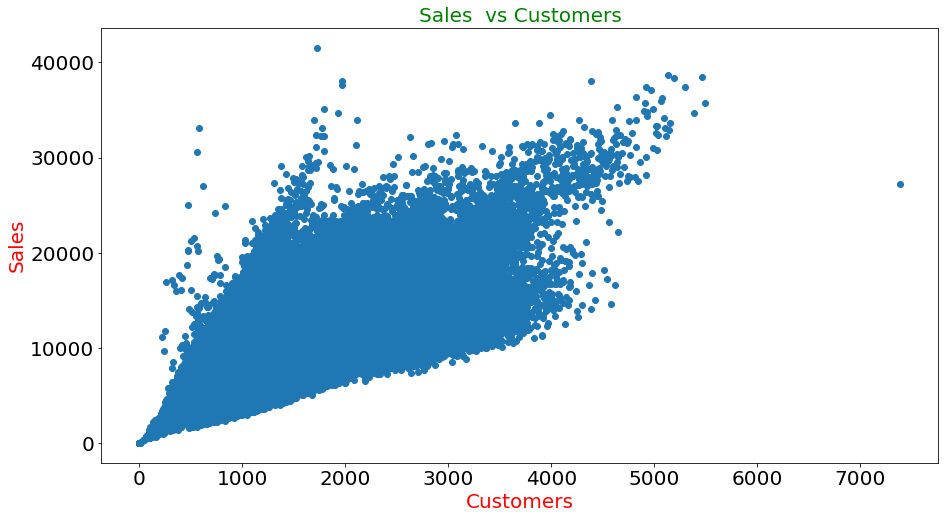

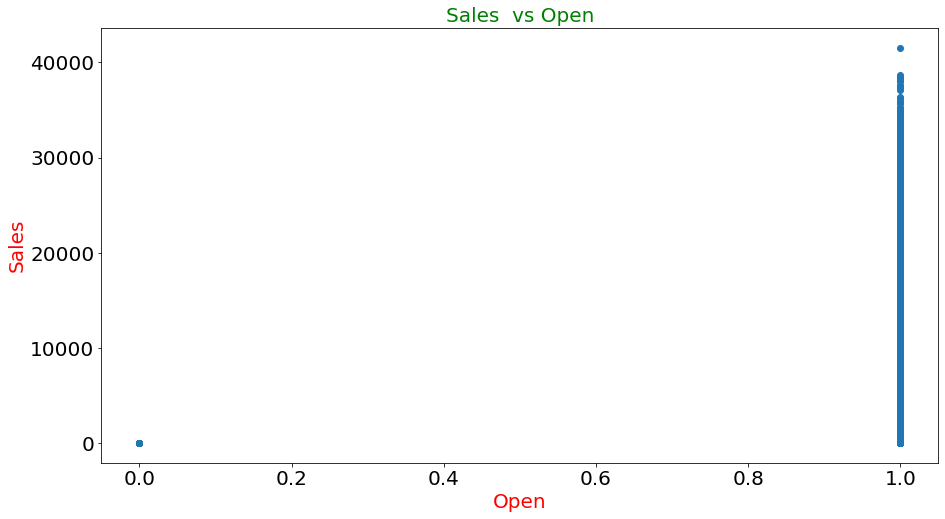

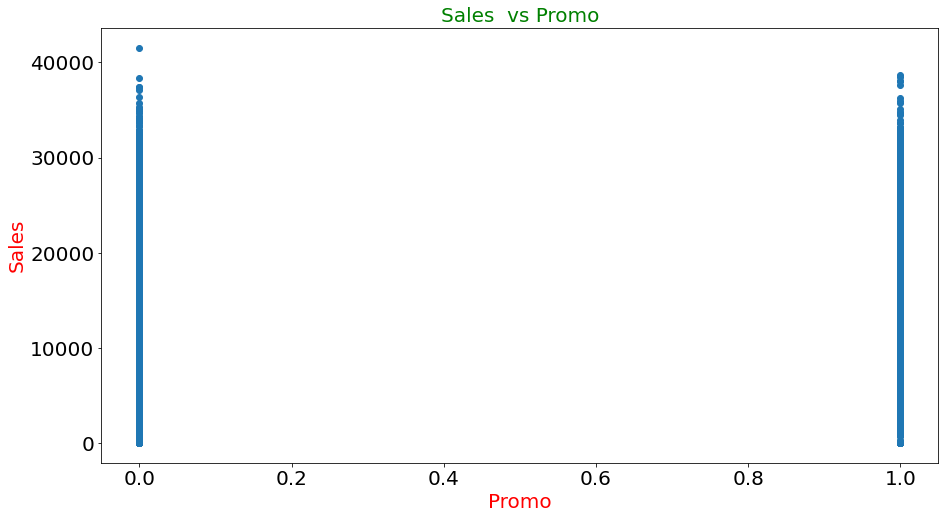

In [ ]:
# Ploting scatter graph  for Sales vs all
for elem in x_list:
    x = df_final[elem]
    y = df_final['Sales']
    plt.scatter(x,y)
    plt.title(f'Sales  vs {elem}', fontsize=20, color='green')
    plt.ylabel('Sales', fontsize=20, color='red')
    plt.xlabel(elem, fontsize=20, color='red')
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.show()

In [ ]:
# importing modules for prediction graph
from sklearn import linear_model

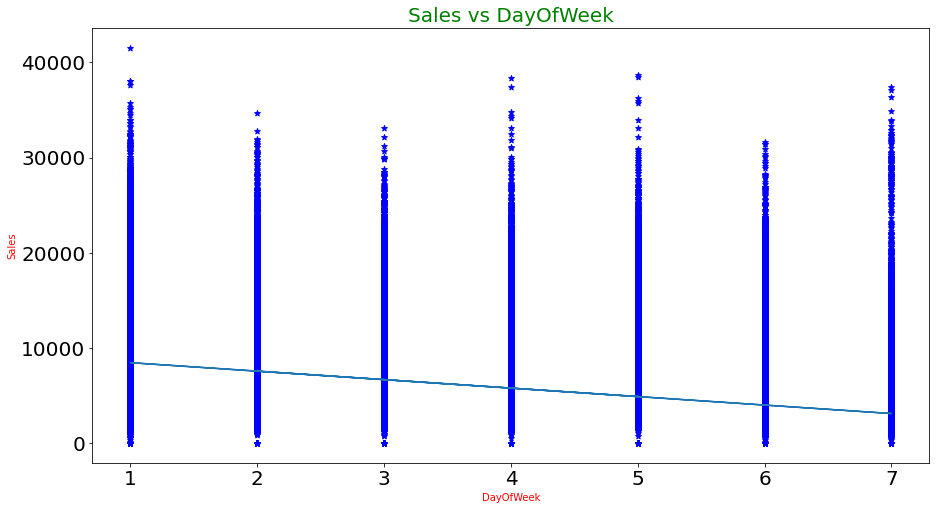

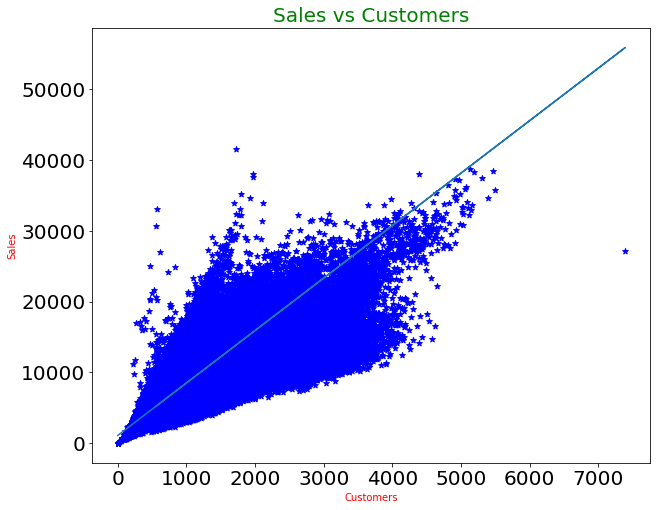

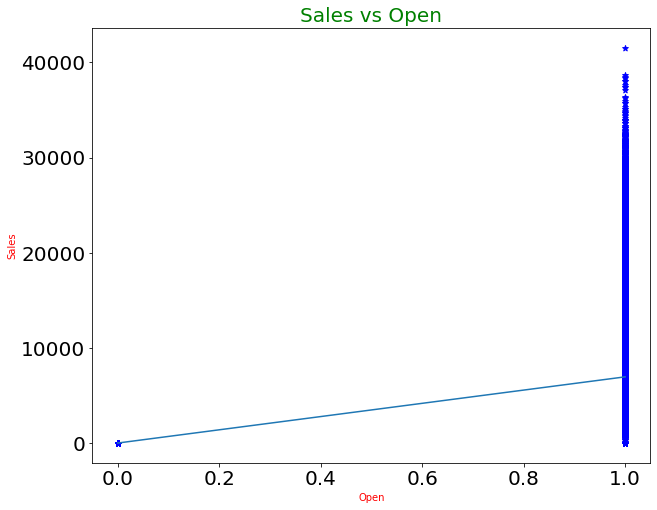

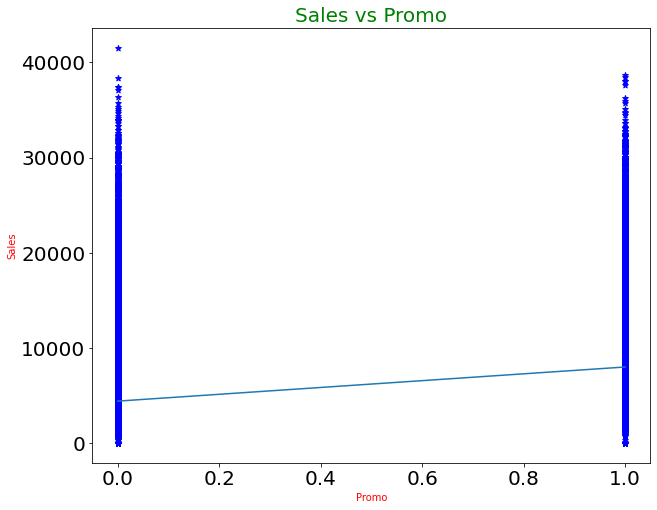

In [ ]:
# Extracting essential columns
col_list = []
for e in x_list:
    col_list.append(e)
for elem in col_list:
    y = df_final['Sales']
    reg = linear_model.LinearRegression()
    reg.fit(df_final[[elem]],y)
    plt.title(f'Sales vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Sales', color='red')
    plt.scatter(df_final[elem],y, color='blue', marker='*')
    plt.plot(df_final[elem], reg.predict(df_final[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

In [ ]:
x = df_final.loc[:,x_list]
y = df_final['Sales']

In [ ]:
x
y

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Linear Regression

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
model1.score(x_test, y_test)

0.8526125909988834

In [ ]:
y_pred = model1.predict(x_test)

Text(0, 0.5, 'predicted set')

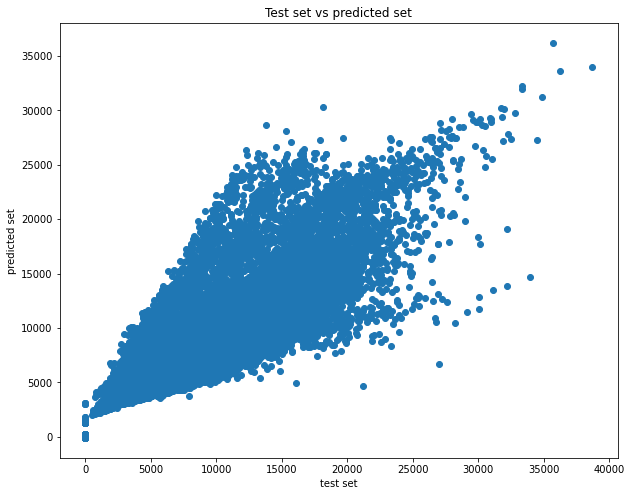

In [ ]:
plt.scatter(y_test,y_pred)
plt.title('Test set vs predicted set')
plt.xlabel('test set')
plt.ylabel('predicted set')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, train_size=0.001, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Get the accuracy scores
model2.score(x_test, y_test)   #because the train size is 0.1% of dataset

0.16848045143087464

In [ ]:
y_pred = model2.predict(x_test)

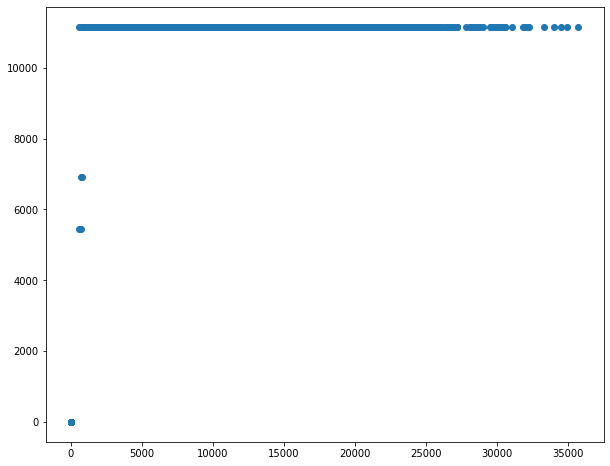

In [ ]:
plt.scatter(y_test,y_pred)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()

In [ ]:
model3.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
model3.score(x_test, y_test)

0.8326635764710019

In [ ]:
y_pred = model3.predict(x_test)

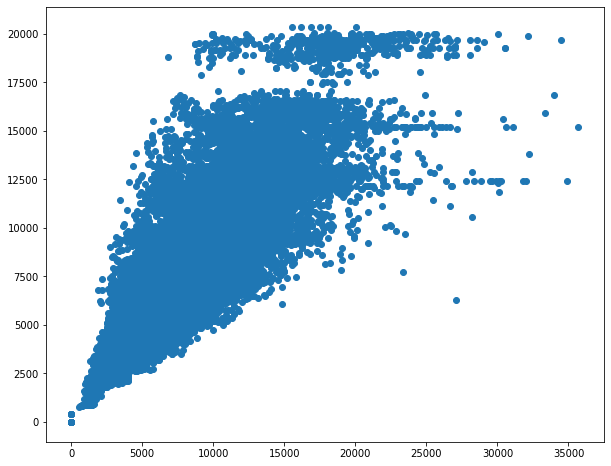

In [ ]:
plt.scatter(y_test,y_pred)